In [117]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBRegressor
import joblib
import os
import warnings

# Directory for saving models
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

In [118]:
warnings.filterwarnings("ignore", category=UserWarning)

# Load the dataset
data_path = './parkinsons_updrs.csv'
parkinsons_data = pd.read_csv(data_path)

# Add column names based on the dataset structure
parkinsons_data.columns = [
    "subject#", "age", "sex", "test_time", "motor_UPDRS", "total_UPDRS",
    "Jitter(%)", "Jitter(Abs)", "Jitter:RAP", "Jitter:PPQ5", "Jitter:DDP",
    "Shimmer", "Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "Shimmer:APQ11",
    "Shimmer:DDA", "NHR", "HNR", "RPDE", "DFA", "PPE"
]

In [119]:
# printing the first 5 rows of the dataframe
parkinsons_data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [120]:
# getting more information about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR            5875 non-null   float64
 18  HNR     

In [121]:
# getting some statistical measures about the data
parkinsons_data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


<Axes: >

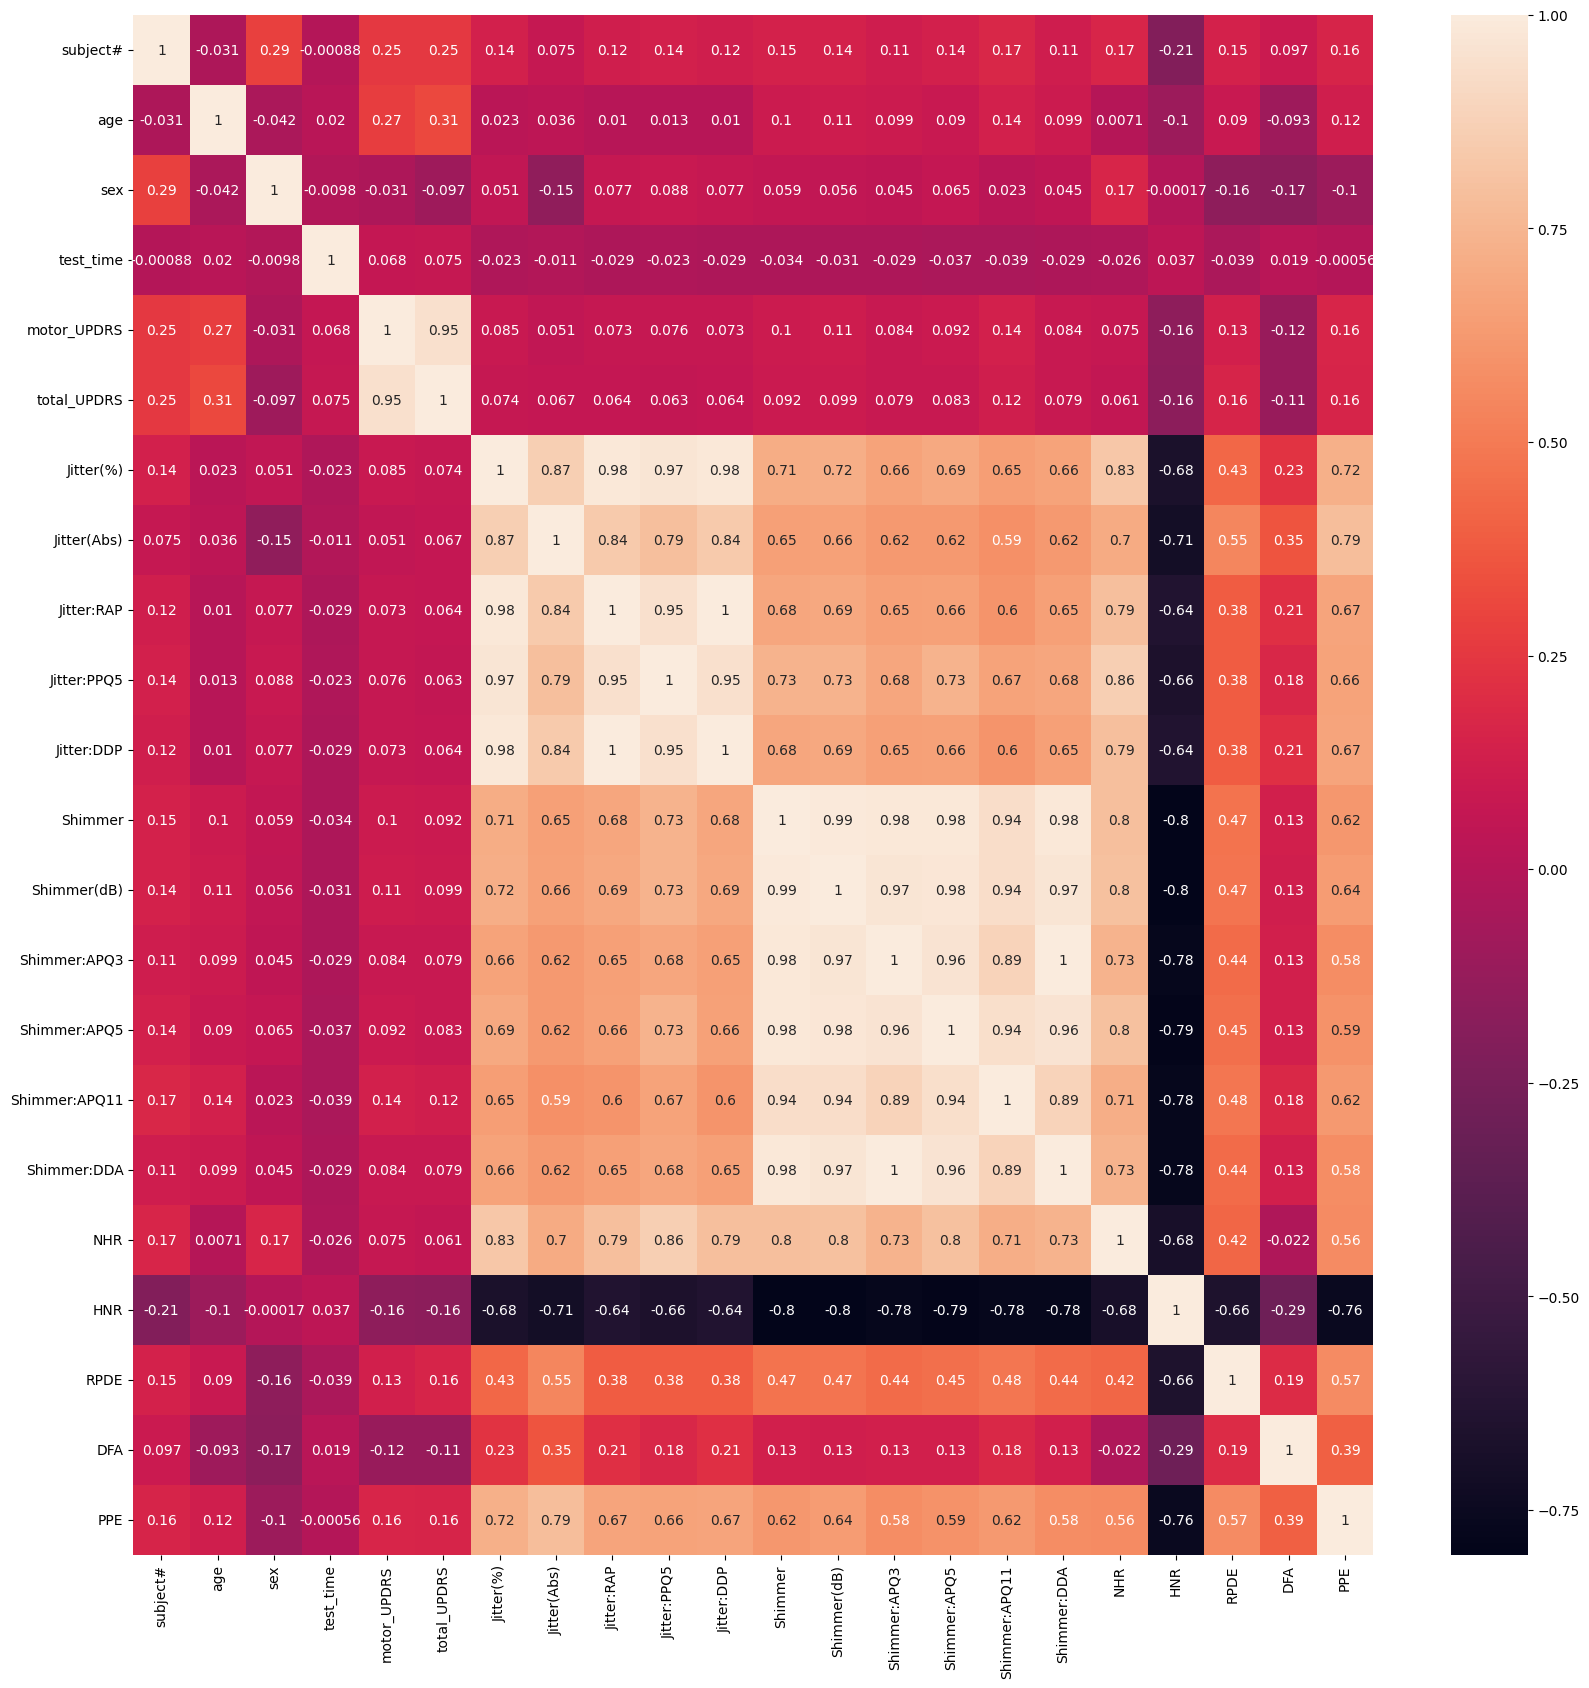

In [122]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(parkinsons_data.corr(),annot=True,ax=ax)

In [123]:
# Define features (X) and target (Y)
X = parkinsons_data.drop(columns=['total_UPDRS'], axis=1)  # Features
Y = parkinsons_data['total_UPDRS']  # Target

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Initialize dictionary to store model R2 scores
r2_results = {}

print(X.shape, X_train.shape, X_test.shape)

(5875, 21) (4700, 21) (1175, 21)


In [124]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [125]:
def plot_confusion_matrix(true_values, predicted_values, model_name):
    # Discretizing the continuous values into bins
    bins = np.linspace(true_values.min(), true_values.max(), num=10)
    true_binned = np.digitize(true_values, bins)
    pred_binned = np.digitize(predicted_values, bins)
    
    # Compute confusion matrix
    cm = confusion_matrix(true_binned, pred_binned)
    
    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=bins[:-1], yticklabels=bins[:-1])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

SVM R2 Score on Test Data: 0.9079818500163593
Model saved


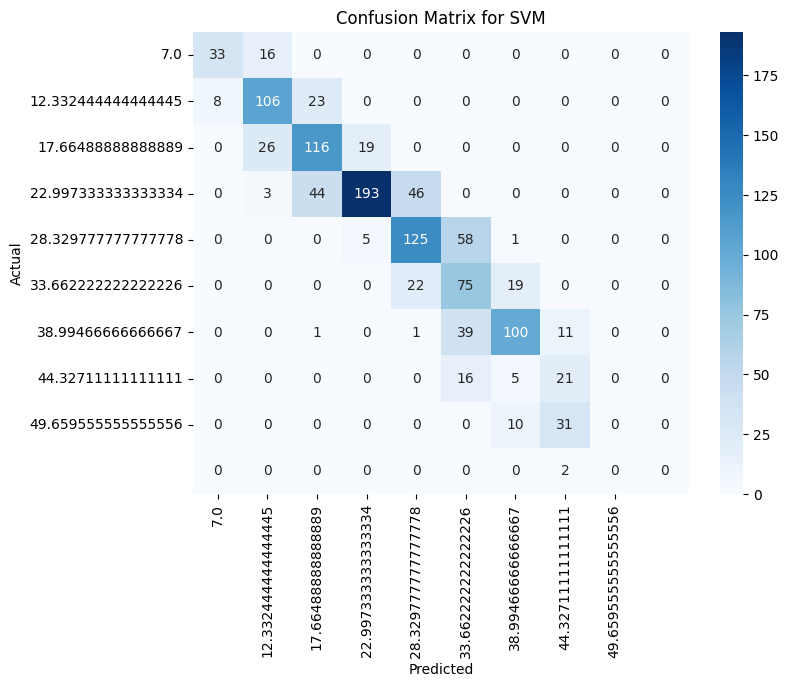

In [126]:
# 1. SVM Model
svm_model = svm.SVR(kernel='linear')
svm_model.fit(X_train_scaled, Y_train)

# Predictions and R2 score
svm_test_pred = svm_model.predict(X_test_scaled)
r2_results['SVM'] = metrics.r2_score(Y_test, svm_test_pred)

print("SVM R2 Score on Test Data:", r2_results['SVM'])
joblib.dump(svm_model, os.path.join(model_dir, 'svm_model.pkl'))
joblib.dump(scaler, os.path.join(model_dir, 'svm_scaler.pkl'))
print('Model saved')
# Plot confusion matrix for SVM
plot_confusion_matrix(Y_test, svm_test_pred, 'SVM')

In [127]:

# Input data for prediction (make sure it's in the correct order and with 21 features)
input_data = (72, 0, 47.649, 29.682, 37.363, 0.00422, 0.00002404, 0.00212, 0.00221, 0.00637, 0.04352, 0.445, 0.02376, 0.02621, 0.03488, 0.07128, 0.01326, 22.506, 0.4925, 0.54779, 0.17563)

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the input data to match the expected shape (1, number_of_features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Load the saved SVM model and scaler
svm_model = joblib.load('models/svm_model.pkl')
svm_scaler = joblib.load('models/svm_scaler.pkl')

# Standardize the input data using the same scaler used during training
std_data = svm_scaler.transform(input_data_reshaped)

# Predict using the loaded SVM model
prediction = svm_model.predict(std_data)

# Output prediction result
if prediction[0] == 0:
    print("[0]--The Person does not have Parkinson's Disease")
else:
    print("[1]--The Person has Parkinson's Disease")


[1]--The Person has Parkinson's Disease


37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network R2 Score on Test Data: 0.9848654222697891


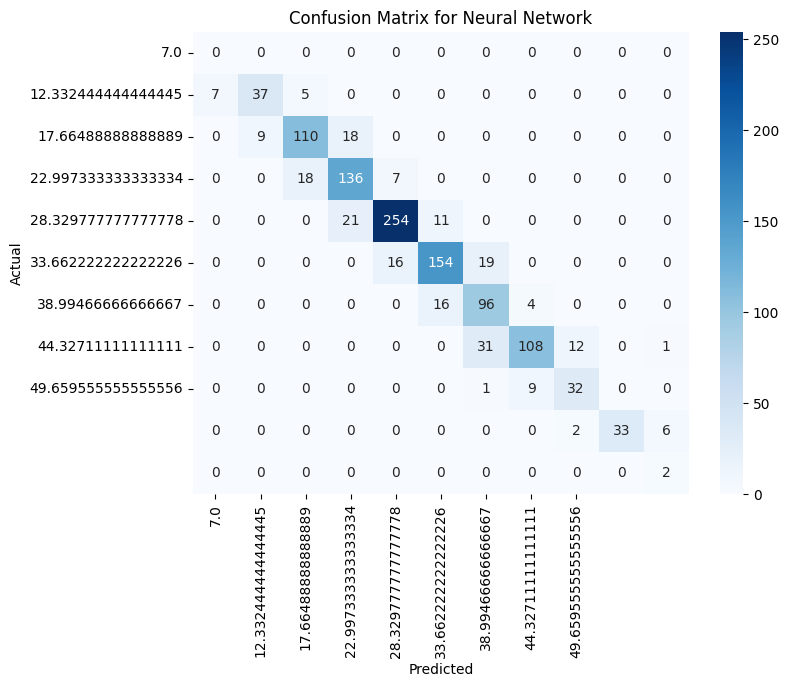

In [128]:
# 2. Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
nn_model.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, verbose=0)

# Predictions and R2 score
nn_test_pred = nn_model.predict(X_test_scaled).flatten()
r2_results['Neural Network'] = metrics.r2_score(Y_test, nn_test_pred)

print("Neural Network R2 Score on Test Data:", r2_results['Neural Network'])
nn_model.save(os.path.join(model_dir, 'neural_network_model.keras'))

# Plot confusion matrix for Neural Network
plot_confusion_matrix(Y_test, nn_test_pred, 'Neural Network')

In [129]:
# Input data for prediction (make sure it's in the correct order and with 21 features)
input_data = (72, 0, 47.649, 29.682, 37.363, 0.00422, 0.00002404, 0.00212, 0.00221, 0.00637, 0.04352, 0.445, 0.02376, 0.02621, 0.03488, 0.07128, 0.01326, 22.506, 0.4925, 0.54779, 0.17563)

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the input data to match the expected shape (1, number_of_features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Load the saved Neural Network model and scaler
nn_model = load_model('models/neural_network_model.keras')

# Standardize the input data using the same scaler used during training
std_data = scaler.transform(input_data_reshaped)

# Predict using the loaded Neural Network model
prediction = nn_model.predict(std_data)

# If it's a binary classification, apply a threshold to the continuous output
# (e.g., use 0.5 for a binary classification)
if prediction[0] < 0.5:  # Adjust this if you use sigmoid activation for binary classification
    print("[0]--The Person does not have Parkinson's Disease")
else:
    print("[1]--The Person has Parkinson's Disease")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[1]--The Person has Parkinson's Disease


XGBoost R2 Score on Test Data: 0.9990853707681547


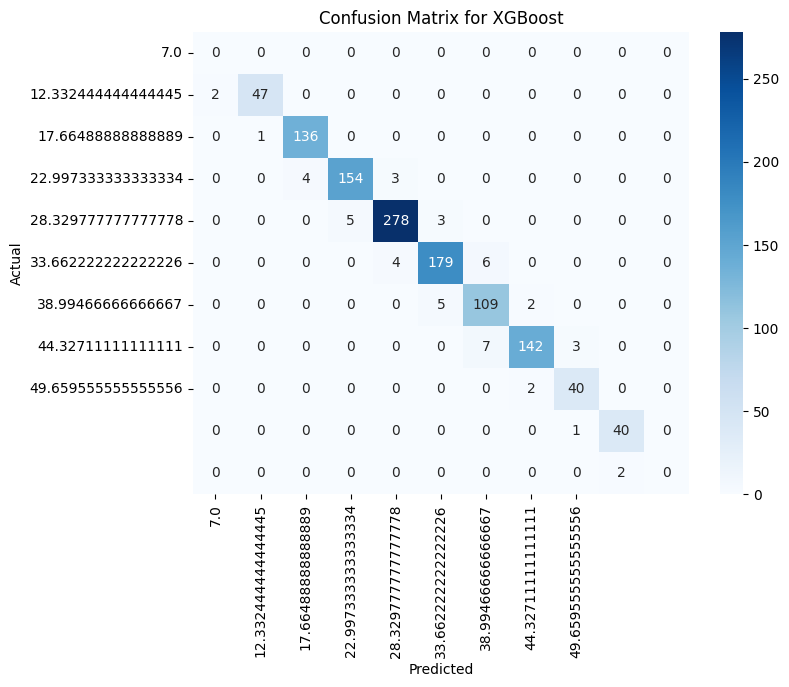

In [130]:
# 3. XGBoost Model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)

# Predictions and R2 score
xgb_test_pred = xgb_model.predict(X_test)
r2_results['XGBoost'] = metrics.r2_score(Y_test, xgb_test_pred)

print("XGBoost R2 Score on Test Data:", r2_results['XGBoost'])
joblib.dump(xgb_model, os.path.join(model_dir, 'xgboost_model.pkl'))

# Plot confusion matrix for XGBoost
plot_confusion_matrix(Y_test, xgb_test_pred, 'XGBoost')

In [131]:
# Input data for prediction (make sure it's in the correct order and with 21 features)
input_data = (72, 0, 47.649, 29.682, 37.363, 0.00422, 0.00002404, 0.00212, 0.00221, 0.00637, 0.04352, 0.445, 0.02376, 0.02621, 0.03488, 0.07128, 0.01326, 22.506, 0.4925, 0.54779, 0.17563)

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the input data to match the expected shape (1, number_of_features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Load the saved XGBoost model
xgb_model = joblib.load('models/xgboost_model.pkl')

# Predict using the loaded XGBoost model (output will be continuous for regression)
prediction = xgb_model.predict(input_data_reshaped)

# If you want to classify it as binary, apply a threshold for classification (e.g., 0.5)
# Assuming regression output, convert it to binary classification if needed
if prediction[0] < 0.5:  # You can adjust the threshold if required
    print("[0]--The Person does not have Parkinson's Disease")
else:
    print("[1]--The Person has Parkinson's Disease")

[1]--The Person has Parkinson's Disease


KNN R2 Score on Test Data: 0.9721744623201504


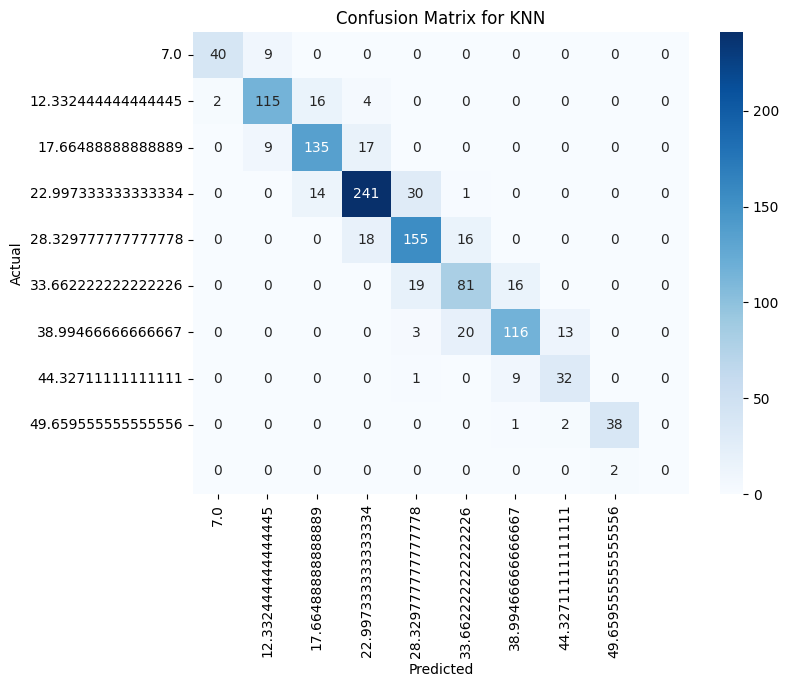

In [132]:
# 4. K-Nearest Neighbors Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, Y_train)

# Predictions and R2 score
knn_test_pred = knn_model.predict(X_test_scaled)
r2_results['KNN'] = metrics.r2_score(Y_test, knn_test_pred)

print("KNN R2 Score on Test Data:", r2_results['KNN'])
joblib.dump(knn_model, os.path.join(model_dir, 'knn_model.pkl'))

# Plot confusion matrix for KNN
plot_confusion_matrix(Y_test, knn_test_pred, 'KNN')


In [133]:
# Input data for prediction (make sure it's in the correct order and with 21 features)
input_data = (72, 0, 47.649, 29.682, 37.363, 0.00422, 0.00002404, 0.00212, 0.00221, 0.00637, 0.04352, 0.445, 0.02376, 0.02621, 0.03488, 0.07128, 0.01326, 22.506, 0.4925, 0.54779, 0.17563)

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the input data to match the expected shape (1, number_of_features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Load the saved KNN model
knn_model = joblib.load('models/knn_model.pkl')

# Predict using the loaded KNN model (output will be continuous for regression)
prediction = knn_model.predict(input_data_reshaped)

# If you want to classify it as binary, apply a threshold for classification (e.g., 0.5)
# Assuming regression output, convert it to binary classification if needed
if prediction[0] < 0.5:  # You can adjust the threshold if required
    print("[0]--The Person does not have Parkinson's Disease")
else:
    print("[1]--The Person has Parkinson's Disease")

[1]--The Person has Parkinson's Disease


Random Forest R2 Score on Test Data: 0.9991970674454513


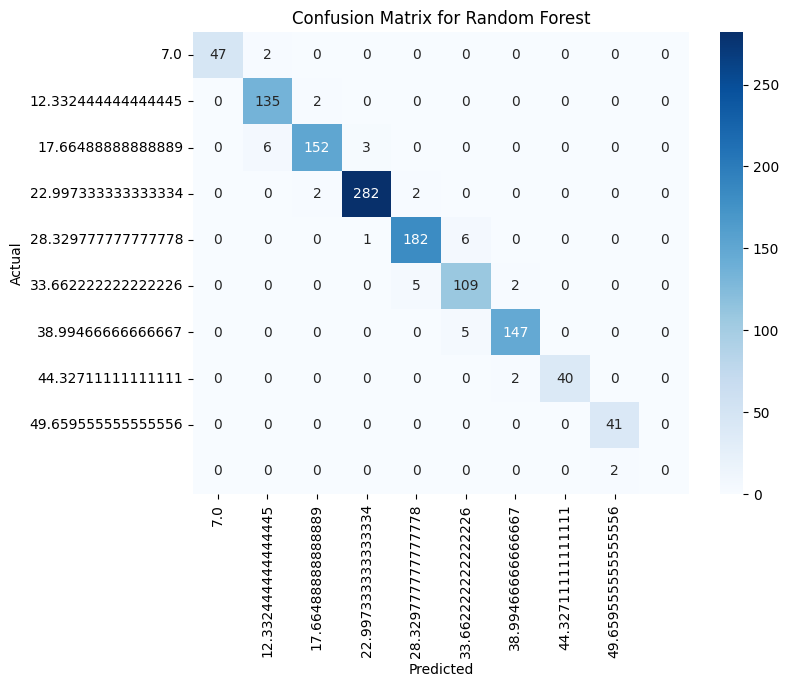

In [134]:
# 5. Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Predictions and R2 score
rf_test_pred = rf_model.predict(X_test)
r2_results['Random Forest'] = metrics.r2_score(Y_test, rf_test_pred)

print("Random Forest R2 Score on Test Data:", r2_results['Random Forest'])
joblib.dump(rf_model, os.path.join(model_dir, 'random_forest_model.pkl'))

# Plot confusion matrix for Random Forest
plot_confusion_matrix(Y_test, rf_test_pred, 'Random Forest')

In [135]:
# Input data for prediction (make sure it's in the correct order and with 21 features)
input_data = (72, 0, 47.649, 29.682, 37.363, 0.00422, 0.00002404, 0.00212, 0.00221, 0.00637, 0.04352, 0.445, 0.02376, 0.02621, 0.03488, 0.07128, 0.01326, 22.506, 0.4925, 0.54779, 0.17563)

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the input data to match the expected shape (1, number_of_features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Load the saved Random Forest model
rf_model = joblib.load('models/random_forest_model.pkl')

# Predict using the loaded Random Forest model (output will be continuous for regression)
prediction = rf_model.predict(input_data_reshaped)

# If you want to classify it as binary, apply a threshold for classification (e.g., 0.5)
# Assuming regression output, convert it to binary classification if needed
if prediction[0] < 0.5:  # You can adjust the threshold if required
    print("[0]--The Person does not have Parkinson's Disease")
else:
    print("[1]--The Person has Parkinson's Disease")

[1]--The Person has Parkinson's Disease


In [136]:
# Compare R2 Scores
r2_df = pd.DataFrame(r2_results.items(), columns=['Model', 'R2 Score'])
print("\nModel R2 Score Comparison:")
print(r2_df)


Model R2 Score Comparison:
            Model  R2 Score
0             SVM  0.907982
1  Neural Network  0.984865
2         XGBoost  0.999085
3             KNN  0.972174
4   Random Forest  0.999197
